### Sprint I - Visualización

In [33]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv("../datos/bikes_clean.csv", index_col = 0)

In [35]:
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,
1,winter,2018,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,winter,2018,2,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,winter,2018,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,spring,2018,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,spring,2018,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


## Correlación

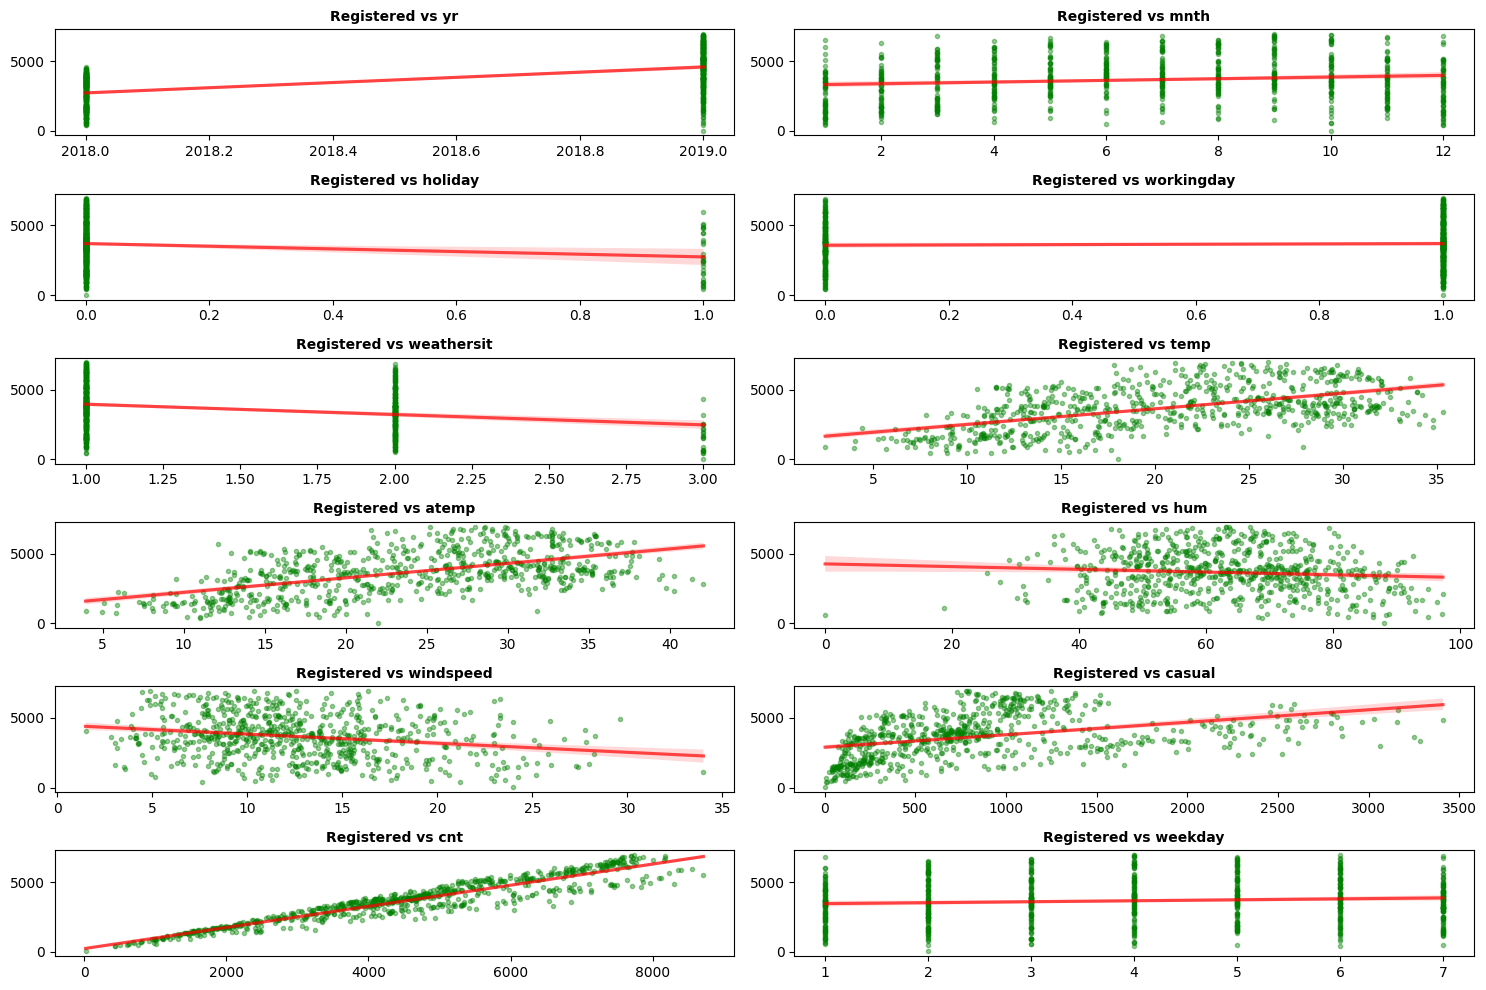

In [36]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("registered")
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum],
        y = df["registered"],
        color = "green",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Registered vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

Vemos que las variables que más influyen a nuestra v. respuesta son el viento, la sensación térmica, la temperatura y la humedad.

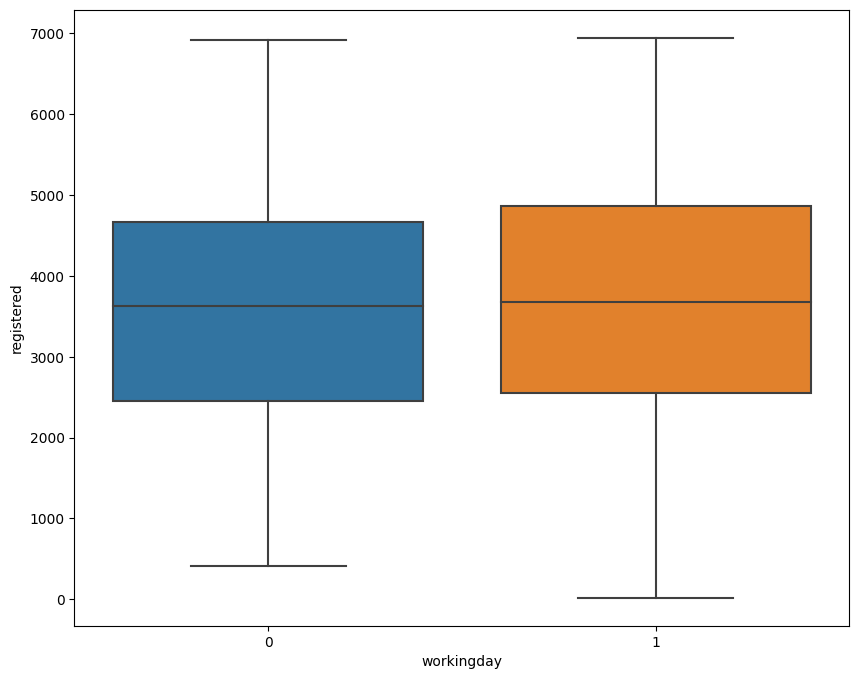

In [37]:
sns.boxplot(y= "registered", x="workingday", data = df) ;

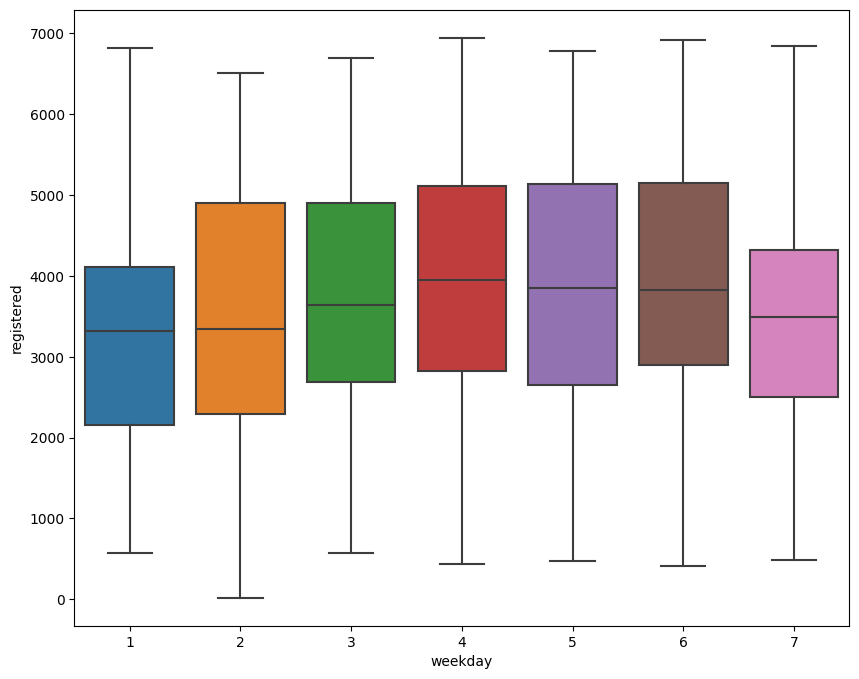

In [38]:
sns.boxplot(y= "registered", x="weekday", data = df) ;

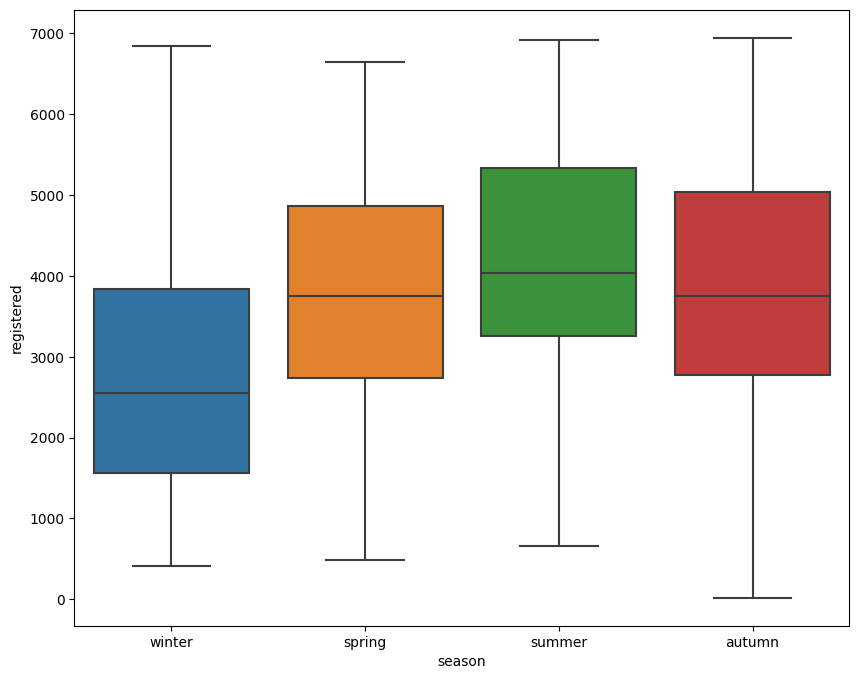

In [39]:
sns.boxplot(y= "registered", x="season", data = df) ;

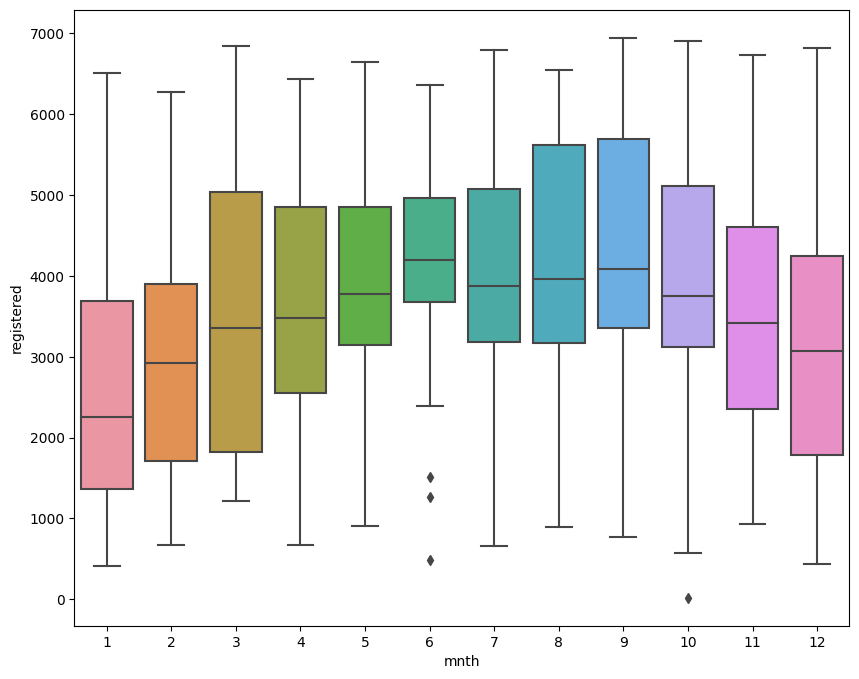

In [40]:
sns.boxplot(y= "registered", x="mnth", data = df) ;

- Para nuestro modelo nos quedaremos con las columnas: season, temperatura, sensación térmica, humedad y velocidad del viento.
- Variable respuesta: registered

In [41]:
df.drop(columns=["yr", "mnth", "holiday", "workingday", "weathersit", "casual", "cnt", "weekday"], inplace=True, axis=1)

In [43]:
df.to_csv("../datos/bikes_clean2.csv")